# Проверим свои силы на датасете CIFAR!
Загрузим и обработаем данные.

In [27]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

import torchvision.datasets
import torch.nn.functional as F

In [28]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [29]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

X_train /= 255.
X_test /= 255.

tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

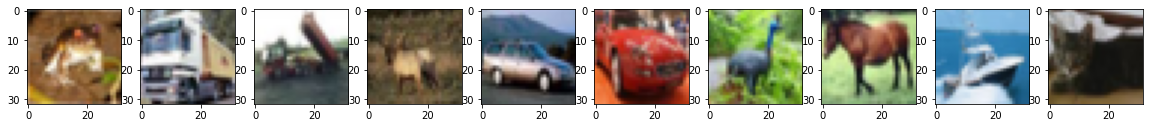

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [31]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [32]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [33]:
def train(net, X_train, y_train, X_test, y_test, batch_size=64, epoch_size=50):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(epoch_size):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
          test_preds = net.forward(X_test)
          test_loss_history.append(loss(test_preds, y_test).data.cpu())

          accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
          test_accuracy_history.append(accuracy)

        print(accuracy)
    del net
    return test_accuracy_history, test_loss_history


In [34]:
accuracies = {}
losses = {}

#LeNet
После создания детектора масочного режима у меня осталось модифицированная LeNet. Не стоит расчитывать, что она успешно справится с этой задачей.

In [35]:

class LeNet(torch.nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=3, out_channels=12, kernel_size=5, padding=0)
        self.act1 = torch.nn.ELU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv1ad = torch.nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, padding=2)
        self.act1ad = torch.nn.ELU()
        self.pool1ad = torch.nn.MaxPool2d(kernel_size=2, stride=1)

        self.conv2 = torch.nn.Conv2d(
            in_channels=24, out_channels=48, kernel_size=5, padding=0)
        self.act2 = torch.nn.ELU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2ad = torch.nn.Conv2d(in_channels=48, out_channels=96, kernel_size=5, padding=2)
        self.act2ad = torch.nn.ELU()
        self.pool2ad = torch.nn.MaxPool2d(kernel_size=2, stride=1)

        self.fc1 = torch.nn.Linear(3 * 3 * 96, 120)
        self.act3 = torch.nn.ELU()

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = torch.nn.ELU()

        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv1ad(x)
        x = self.act1ad(x)
        x = self.pool1ad(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = self.conv2ad(x)
        x = self.act2ad(x)
        x = self.pool2ad(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

In [36]:
accuracies['lenet'], losses['lenet'] = \
    train(LeNet(), X_train, y_train, X_test, y_test)

tensor(0.5450)
tensor(0.6137)
tensor(0.6328)
tensor(0.6763)
tensor(0.6800)
tensor(0.6988)
tensor(0.7025)
tensor(0.6924)
tensor(0.7086)
tensor(0.7021)
tensor(0.6866)
tensor(0.6842)
tensor(0.6843)
tensor(0.6935)
tensor(0.6932)
tensor(0.6914)
tensor(0.6892)
tensor(0.6954)
tensor(0.6815)
tensor(0.6949)
tensor(0.6849)
tensor(0.6839)
tensor(0.6808)
tensor(0.6832)
tensor(0.6875)
tensor(0.6949)
tensor(0.6893)
tensor(0.6816)
tensor(0.6812)
tensor(0.6886)
tensor(0.6909)
tensor(0.6813)
tensor(0.6784)
tensor(0.6849)
tensor(0.6735)
tensor(0.6861)
tensor(0.6853)
tensor(0.6797)
tensor(0.6894)
tensor(0.6893)
tensor(0.6743)
tensor(0.6889)
tensor(0.6787)
tensor(0.6855)
tensor(0.6840)
tensor(0.6834)
tensor(0.6861)
tensor(0.6662)
tensor(0.6882)
tensor(0.6812)


Улучшенный LeNet показал более высокие результаты, чем я думал, но она недостаточно глубокая и быстро переобучается. 

#ResNet18
В PyTorch уже реализованы сети ResNet. Попробоем ResNet18.

In [37]:
from torchvision.models import resnet18

accuracies['resnet18'], losses['resnet18'] = \
    train(resnet18(), X_train, y_train, X_test, y_test)

tensor(0.5232)
tensor(0.6335)
tensor(0.6430)
tensor(0.6823)
tensor(0.6918)
tensor(0.7214)
tensor(0.7143)
tensor(0.7459)
tensor(0.6383)
tensor(0.7495)
tensor(0.7517)
tensor(0.7472)
tensor(0.7500)
tensor(0.7431)
tensor(0.7518)
tensor(0.7378)
tensor(0.7462)
tensor(0.7681)
tensor(0.7570)
tensor(0.7592)
tensor(0.7127)
tensor(0.7531)
tensor(0.7593)
tensor(0.7523)
tensor(0.7257)
tensor(0.7616)
tensor(0.7608)
tensor(0.7596)
tensor(0.7390)
tensor(0.7639)
tensor(0.7559)
tensor(0.7537)
tensor(0.7572)
tensor(0.7510)
tensor(0.7552)
tensor(0.7522)
tensor(0.7530)
tensor(0.7541)
tensor(0.7688)
tensor(0.7633)
tensor(0.7624)
tensor(0.7644)
tensor(0.7690)
tensor(0.7614)
tensor(0.7634)
tensor(0.7560)
tensor(0.7612)
tensor(0.7552)
tensor(0.7637)
tensor(0.7490)


Нормальный результат, но не впечатляет. Посмотрим на графики accuracy и loss.

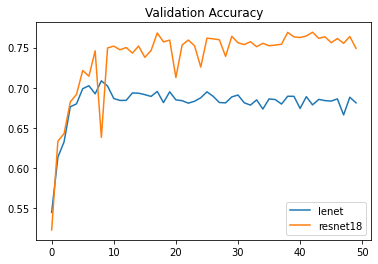

In [38]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

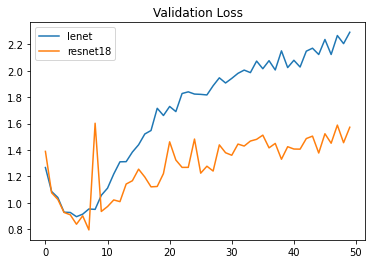

In [39]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

После 8 эпохи ResNet начинает переобучаться. Что касается LeNet, то она переобучается еще сильнее.
Сети типа ResNet18 предназначались для датасета ImageNet. Для датасета CIFAR есть кое что получше.

#ResNet20
В оригинальной статье(https://arxiv.org/pdf/1512.03385.pdf) разработчики предлагают особый вариант сети ResNet для датасета CIFAR. В PyTorch нет реализации этого варианта, потому предется реализовывать самим. Вот основа, на которую я опирался: https://github.com/akamaster/pytorch_resnet_cifar10


In [44]:
class LambdaLayer(torch.nn.Module):
    def __init__(self, lambd):
        super(LambdaLayer, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)


class SimpleBlock(torch.nn.Module):
    def __init__(self, in_channels, increase_dim=False, option='A',
                 use_batch_norm=True, use_drop_out=False, d_out_p=0.15):
        super(SimpleBlock, self).__init__()

        self.use_batch_norm = use_batch_norm
        self.use_drop_out = use_drop_out
        self.act = torch.nn.ReLU()

        out_channels = in_channels if not increase_dim else in_channels * 2
        first_stride = 1 if not increase_dim else 2

        self.conv1 = torch.nn.Conv2d(in_channels, out_channels, kernel_size=3,
                                     stride=first_stride, padding=1, bias=False)
        self.bn1 = torch.nn.BatchNorm2d(out_channels)
        self.d_out1 = torch.nn.Dropout2d(d_out_p)

        self.conv2 = torch.nn.Conv2d(out_channels, out_channels, kernel_size=3,
                                     stride=1, padding=1, bias=False)
        self.bn2 = torch.nn.BatchNorm2d(out_channels)
        self.d_out2 = torch.nn.Dropout2d(d_out_p)

        self.shortcut = torch.nn.Sequential()
        if increase_dim:
            if option == 'A':
                self.shortcut = LambdaLayer(lambda x: F.pad(x[:, :, ::2, ::2],
                                                            (0, 0, 0, 0, in_channels // 2, in_channels // 2),
                                                            "constant", 0))
            elif option == 'B':
                self.shortcut = torch.nn.Sequential(
                    torch.nn.Conv2d(in_channels, in_channels * 2, kernel_size=1, stride=2,
                                    padding=0, bias=False),
                    torch.nn.BatchNorm2d(in_channels * 4)
                )

    def forward(self, x):
        out = self.conv1(x)
        if self.use_batch_norm:
            out = self.bn1(out)
        if self.use_drop_out:
            out = self.d_out1(out)
        out = self.act(out)

        out = self.conv2(out)
        if self.use_batch_norm:
            out = self.bn2(out)
        if self.use_drop_out:
            out = self.d_out2(out)
        out = self.act(out)

        out += self.shortcut(x)
        out = self.act(out)
        return out


class BottleneckBlock(torch.nn.Module):
    def __init__(self, in_channels, increase_dim=False, option='A',
                 use_batch_norm=True, use_drop_out=False, d_out_p=0.15):
        super(BottleneckBlock, self).__init__()

        self.use_batch_norm = use_batch_norm
        self.use_drop_out = use_drop_out
        self.act = torch.nn.ReLU()

        bottleneck_channels = in_channels // 4 if not increase_dim else in_channels // 2
        first_stride = 1 if not increase_dim else 2

        self.conv1 = torch.nn.Conv2d(in_channels, bottleneck_channels, kernel_size=1,
                                     stride=first_stride, padding=0, bias=False)
        self.bn1 = torch.nn.BatchNorm2d(bottleneck_channels)
        self.d_out1 = torch.nn.Dropout2d(d_out_p)

        self.conv2 = torch.nn.Conv2d(bottleneck_channels, bottleneck_channels, kernel_size=3,
                                     stride=1, padding=1, bias=False)
        self.bn2 = torch.nn.BatchNorm2d(bottleneck_channels)
        self.d_out2 = torch.nn.Dropout2d(d_out_p)

        self.conv3 = torch.nn.Conv2d(bottleneck_channels, bottleneck_channels * 4, kernel_size=1,
                                     stride=1, padding=0, bias=False)
        self.bn3 = torch.nn.BatchNorm2d(bottleneck_channels * 4)
        self.d_out3 = torch.nn.Dropout2d(d_out_p)

        self.shortcut = torch.nn.Sequential()
        if increase_dim:
            if option == 'A':
                self.shortcut = LambdaLayer(lambda x: F.pad(x[:, :, ::2, ::2],
                                 (0, 0, 0, 0, in_channels // 2, in_channels // 2), "constant", 0))
            elif option == 'B':
                self.shortcut = torch.nn.Sequential(
                    torch.nn.Conv2d(in_channels, in_channels * 2, kernel_size=1, stride=2,
                                    padding=0, bias=False),
                    torch.nn.BatchNorm2d(in_channels * 4)
                )

    def forward(self, x):
        out = self.conv1(x)
        if self.use_batch_norm:
            out = self.bn1(out)
        if self.use_drop_out:
            out = self.d_out1(out)
        out = self.act(out)

        out = self.conv2(out)
        if self.use_batch_norm:
            out = self.bn2(out)
        if self.use_drop_out:
            out = self.d_out2(out)
        out = self.act(out)

        out = self.conv3(out)
        if self.use_batch_norm:
            out = self.bn3(out)
        if self.use_drop_out:
            out = self.d_out3(out)
        out = self.act(out)

        out += self.shortcut(x)
        out = self.act(out)
        return out


class ResNet(torch.nn.Module):
    def __init__(self, block, num_blocks, num_classes=10,
                 use_batch_norm=True, use_drop_out=False, d_out_p=0.15):
        super(ResNet, self).__init__()

        self.use_batch_norm = use_batch_norm
        self.use_drop_out = use_drop_out
        self.d_out_p = d_out_p
        self.act = torch.nn.ReLU()

        bottleneck_mul = 4 if issubclass(block, BottleneckBlock) else 1

        self.conv1 = torch.nn.Conv2d(3, 16 * bottleneck_mul,
                                     kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = torch.nn.BatchNorm2d(16 * bottleneck_mul)
        self.d_out1 = torch.nn.Dropout2d(d_out_p)

        self.layer1 = self._make_layer(block, 16 * bottleneck_mul, num_blocks[0], increase_dim=False)
        self.layer2 = self._make_layer(block, 16 * bottleneck_mul, num_blocks[1], increase_dim=True)
        self.layer3 = self._make_layer(block, 32 * bottleneck_mul, num_blocks[2], increase_dim=True)

        self.linear = torch.nn.Linear(64 * bottleneck_mul, num_classes)

    def _make_layer(self, block, in_channels, num_blocks, increase_dim=True):
        increase_dim_list = [increase_dim] + [False] * (num_blocks - 1)
        in_channels_list = [in_channels] + \
                            [in_channels * 2 if increase_dim else in_channels] * (num_blocks - 1)
        layers = []

        for i in range(num_blocks):
            layers.append(block(in_channels_list[i], increase_dim=increase_dim_list[i],
                                use_batch_norm=self.use_batch_norm,
                                use_drop_out=self.use_drop_out,
                                d_out_p=self.d_out_p))

        return torch.nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        if self.use_batch_norm:
            out = self.bn1(out)
        if self.use_drop_out:
            out = self.d_out1(out)
        out = self.act(out)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)

        out = torch.nn.functional.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        
        return out

Попробуем два вида блоков: простой и Bottleneck. Последний глубже и при этом имеет меньше параметров.

In [45]:
net = ResNet(SimpleBlock, [3, 3, 3], use_batch_norm=True, use_drop_out=False, d_out_p=0.15)
accuracies['resnet20'], losses['resnet20'] = \
    train(net, X_train, y_train, X_test, y_test)

tensor(0.5687)
tensor(0.6520)
tensor(0.7092)
tensor(0.7272)
tensor(0.7465)
tensor(0.7544)
tensor(0.7504)
tensor(0.8142)
tensor(0.7650)
tensor(0.8014)
tensor(0.7352)
tensor(0.8017)
tensor(0.8021)
tensor(0.8036)
tensor(0.7637)
tensor(0.8057)
tensor(0.7983)
tensor(0.8086)
tensor(0.8100)
tensor(0.8192)
tensor(0.8109)
tensor(0.7985)
tensor(0.7970)
tensor(0.8056)
tensor(0.7922)
tensor(0.7773)
tensor(0.7949)
tensor(0.8184)
tensor(0.8195)
tensor(0.7885)
tensor(0.8092)
tensor(0.8142)
tensor(0.8122)
tensor(0.8069)
tensor(0.8173)
tensor(0.8127)
tensor(0.8067)
tensor(0.8169)
tensor(0.7944)
tensor(0.8132)
tensor(0.8204)
tensor(0.8151)
tensor(0.8122)
tensor(0.8235)
tensor(0.8190)
tensor(0.8012)
tensor(0.8161)
tensor(0.7988)
tensor(0.8094)
tensor(0.8132)


In [46]:
net = ResNet(BottleneckBlock, [3, 3, 3], use_batch_norm=True, use_drop_out=False, d_out_p=0.15)
accuracies['resnet20_bottleneck'], losses['resnet20_bottleneck'] = \
    train(net, X_train, y_train, X_test, y_test)

tensor(0.6134)
tensor(0.6198)
tensor(0.7379)
tensor(0.7339)
tensor(0.7433)
tensor(0.7288)
tensor(0.7450)
tensor(0.7959)
tensor(0.7463)
tensor(0.7855)
tensor(0.7815)
tensor(0.7936)
tensor(0.7979)
tensor(0.7766)
tensor(0.7898)
tensor(0.7941)
tensor(0.7927)
tensor(0.7833)
tensor(0.7733)
tensor(0.7920)
tensor(0.7965)
tensor(0.7988)
tensor(0.7959)
tensor(0.8093)
tensor(0.7913)
tensor(0.7886)
tensor(0.8024)
tensor(0.7910)
tensor(0.7916)
tensor(0.8059)
tensor(0.8107)
tensor(0.7992)
tensor(0.8053)
tensor(0.8056)
tensor(0.8036)
tensor(0.8046)
tensor(0.7966)
tensor(0.8062)
tensor(0.8053)
tensor(0.8136)
tensor(0.8072)
tensor(0.8094)
tensor(0.8108)
tensor(0.8113)
tensor(0.8125)
tensor(0.8087)
tensor(0.8087)
tensor(0.8097)
tensor(0.8125)
tensor(0.8084)


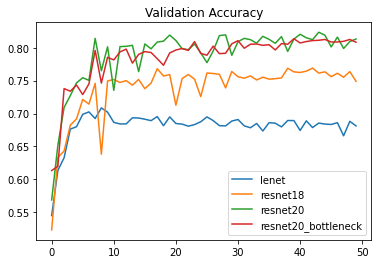

In [47]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

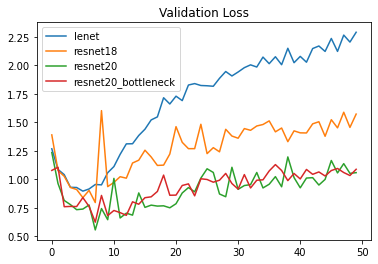

In [48]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

Сети ResNet20, специально заточенные под CIFAR, показали себя значительно лучше. Интересно, что простой и Bottleneck блоки ведут себя очень схоже, так что большой разницы между ними нет.

#Drop-out
Остановимся на простых блоках и постараемся решить проблему, которая преследует все наши сети, а именно переобучение. Добавим drop-out и посмотрим, что изменится.

In [49]:
net = ResNet(SimpleBlock, [3, 3, 3], use_batch_norm=True, use_drop_out=True, d_out_p=0.15)
accuracies['resnet20_do15'], losses['resnet20_do15'] = \
    train(net, X_train, y_train, X_test, y_test)

tensor(0.4854)
tensor(0.5816)
tensor(0.6460)
tensor(0.6684)
tensor(0.6886)
tensor(0.7321)
tensor(0.7499)
tensor(0.7636)
tensor(0.7696)
tensor(0.7801)
tensor(0.7966)
tensor(0.7950)
tensor(0.8126)
tensor(0.8115)
tensor(0.8164)
tensor(0.8198)
tensor(0.8199)
tensor(0.8216)
tensor(0.8300)
tensor(0.8189)
tensor(0.8340)
tensor(0.8294)
tensor(0.8326)
tensor(0.8295)
tensor(0.8305)
tensor(0.8317)
tensor(0.8375)
tensor(0.8399)
tensor(0.8364)
tensor(0.8411)
tensor(0.8363)
tensor(0.8435)
tensor(0.8374)
tensor(0.8378)
tensor(0.8387)
tensor(0.8397)
tensor(0.8426)
tensor(0.8438)
tensor(0.8421)
tensor(0.8415)
tensor(0.8406)
tensor(0.8404)
tensor(0.8466)
tensor(0.8446)
tensor(0.8472)
tensor(0.8401)
tensor(0.8483)
tensor(0.8462)
tensor(0.8470)
tensor(0.8403)


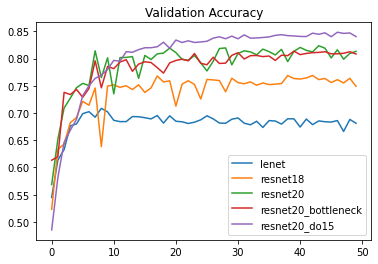

In [50]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

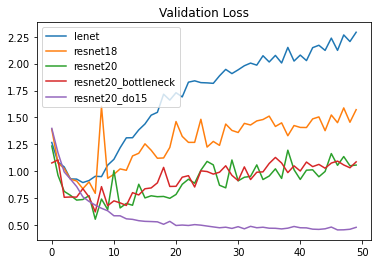

In [51]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

Drop-out решил проблему переобучения и значительно улучшил точность модели. 

#SuperResNet
Предлагаю поэкспериментировать с архитектурой ResNet. Оригинальная ResNet использует специальные блоки, которые пробрасывают входы и не дают градиенту затухнуть. Однако длина этого броска небольшая и в зависимости от типа блока составляет 2-3 слоя. В действительно глубоких сетях ResNet градиент все равно затухает. Давайте обьединим несколько блоков в один большой SuperResBlock и пробросим вход по тому же принципу, что и в обычных блоках. 

In [52]:
class SuperResBlock(torch.nn.Module):
    def __init__(self, in_channels, block=SimpleBlock, increase_dim=False, option='A',
                 use_batch_norm=True, use_drop_out=False, d_out_p=0.15):
        super(SuperResBlock, self).__init__()

        self.use_batch_norm = use_batch_norm
        self.use_drop_out = use_drop_out
        self.act = torch.nn.ReLU()

        out_channels = in_channels if not increase_dim else in_channels * 2

        self.block1 = block(in_channels, increase_dim=increase_dim, option=option,
                            use_batch_norm=use_batch_norm, use_drop_out=use_drop_out, d_out_p=d_out_p)
        self.block2 = block(out_channels, increase_dim=False, option=option,
                            use_batch_norm=use_batch_norm, use_drop_out=use_drop_out, d_out_p=d_out_p)
        self.block3 = block(out_channels, increase_dim=False, option=option,
                            use_batch_norm=use_batch_norm, use_drop_out=use_drop_out, d_out_p=d_out_p)

        self.shortcut = torch.nn.Sequential()
        if increase_dim:
            if option == 'A':
                self.shortcut = LambdaLayer(lambda x: F.pad(x[:, :, ::2, ::2],
                                                            (0, 0, 0, 0, in_channels // 2, in_channels // 2),
                                                            "constant", 0))
            elif option == 'B':
                self.shortcut = torch.nn.Sequential(
                    torch.nn.Conv2d(in_channels, in_channels * 2, kernel_size=1, stride=2,
                                    padding=0, bias=False),
                    torch.nn.BatchNorm2d(in_channels * 4)
                )

    def forward(self, x):
        out = self.block3(self.block2(self.block1(x)))
        out += self.shortcut(x)
        out = self.act(out)

        return out

In [53]:
net = ResNet(SuperResBlock, [1, 1, 1], use_batch_norm=True, use_drop_out=True, d_out_p=0.15)
accuracies['super_resnet20'], losses['super_resnet20'] = \
    train(net, X_train, y_train, X_test, y_test)

tensor(0.5019)
tensor(0.5405)
tensor(0.6278)
tensor(0.6541)
tensor(0.6928)
tensor(0.7060)
tensor(0.7330)
tensor(0.7525)
tensor(0.7749)
tensor(0.7592)
tensor(0.7838)
tensor(0.7993)
tensor(0.8002)
tensor(0.7962)
tensor(0.8115)
tensor(0.8067)
tensor(0.8176)
tensor(0.8103)
tensor(0.8118)
tensor(0.8253)
tensor(0.8238)
tensor(0.8287)
tensor(0.8206)
tensor(0.8301)
tensor(0.8239)
tensor(0.8309)
tensor(0.8287)
tensor(0.8364)
tensor(0.8331)
tensor(0.8309)
tensor(0.8261)
tensor(0.8303)
tensor(0.8394)
tensor(0.8358)
tensor(0.8382)
tensor(0.8442)
tensor(0.8396)
tensor(0.8410)
tensor(0.8427)
tensor(0.8413)
tensor(0.8359)
tensor(0.8428)
tensor(0.8412)
tensor(0.8453)
tensor(0.8433)
tensor(0.8416)
tensor(0.8484)
tensor(0.8475)
tensor(0.8405)
tensor(0.8451)


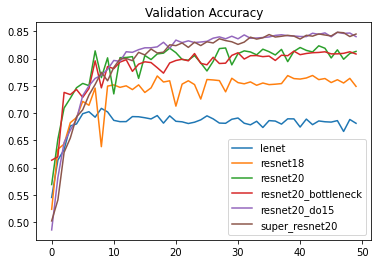

In [54]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

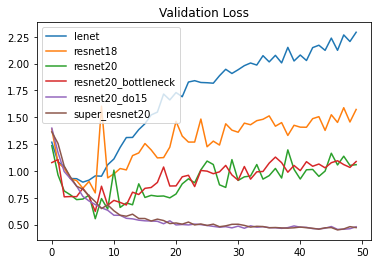

In [55]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

К сожалению, наша чудо-сеть не помгла улучшить результаты. Думаю стоит попробовать эту модификацию при большей глубине сети.

Что еще можно сделать?


*   В первую очередь стоит добавить аугментацию. Она усеньшит переобучение и повысит точность. Разработчики ResNet использования аугментации даже отказались от drop-out.
*   Дальше можно попробовать заменить Adam на SGD и повозиться с momentum. Также улучшает сходимость правильно подобранный динамический learning rate.
*   Ну и конечно попробовать другие архитектуры. ResNet уже давно утратила лидерские позиции.





